<a href="https://colab.research.google.com/github/pranav168/Credit-Card-Default-Prediction/blob/develop/Credit_Card_Default_Prediction_final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,Normalizer,StandardScaler
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn.linear_model import LogisticRegressionCV
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
!pip install colorama
from imblearn.over_sampling import SMOTE

In [197]:
df=pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls',header=1)

In [109]:
df.info()       #no Nan/null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [110]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [198]:
df.drop('ID',axis=1,inplace=True)    #straight away removing ID as it is not at all needed

In [112]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


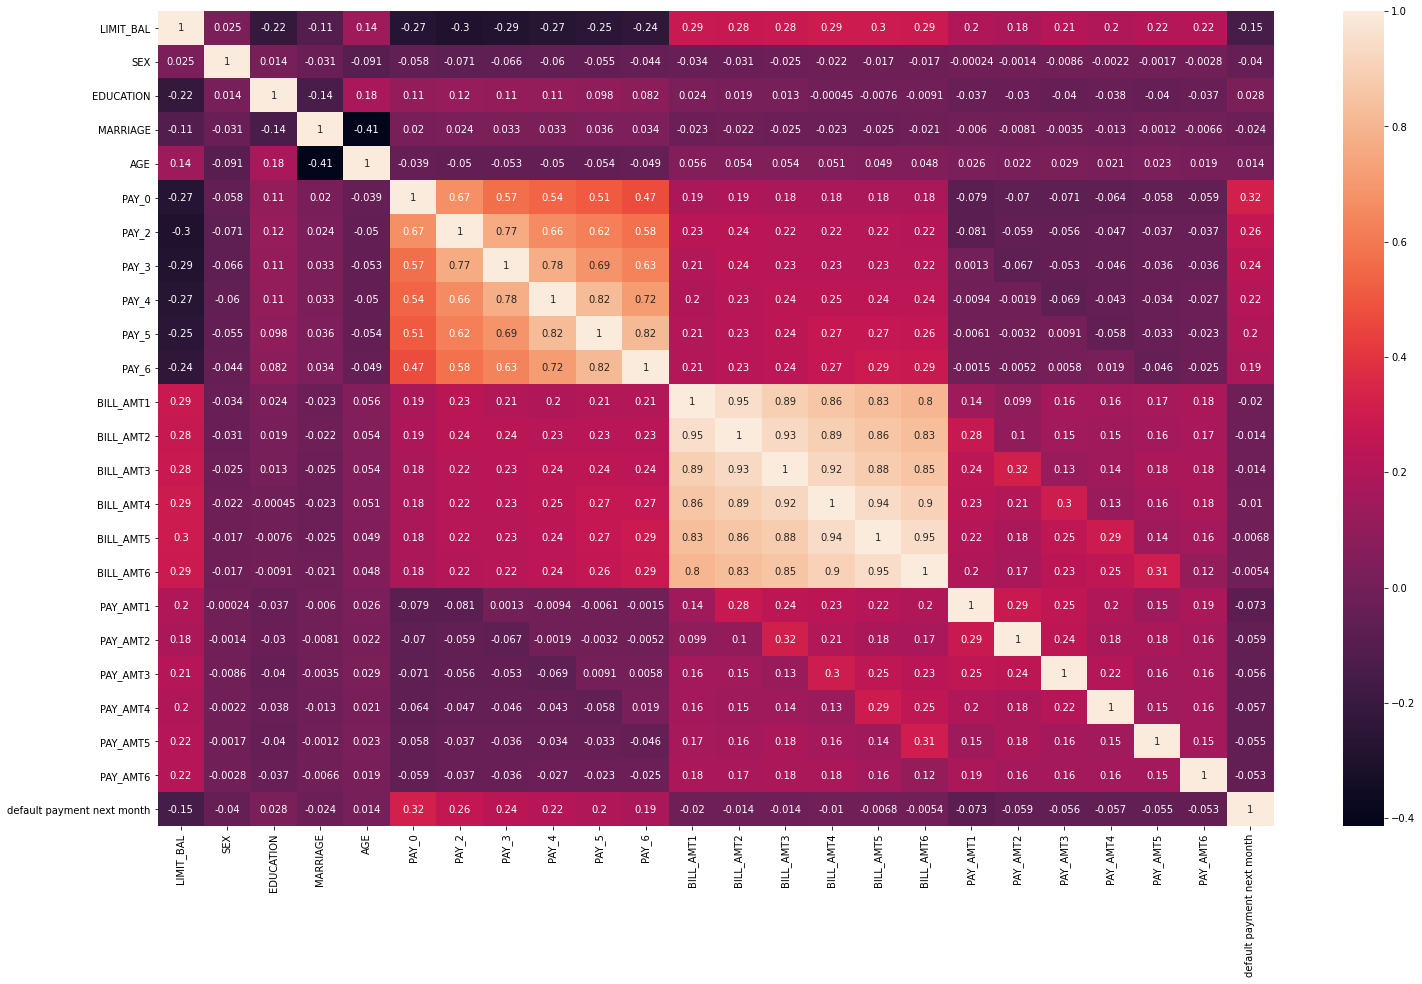

In [113]:
corr = df.corr() #plotting co-relation chart
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)
plt.show()                                      

few features are highly correlated to each other, well settle this multicollinearity later when dealing with models which are not immune to it

also we can see that correlation between our label and features is not that great especially for certain features like bill_amt's, pay_amt's , sex, marriage and age. this is actually a matter of concern!!

In [149]:
df_default=df[df['default payment next month']==1]

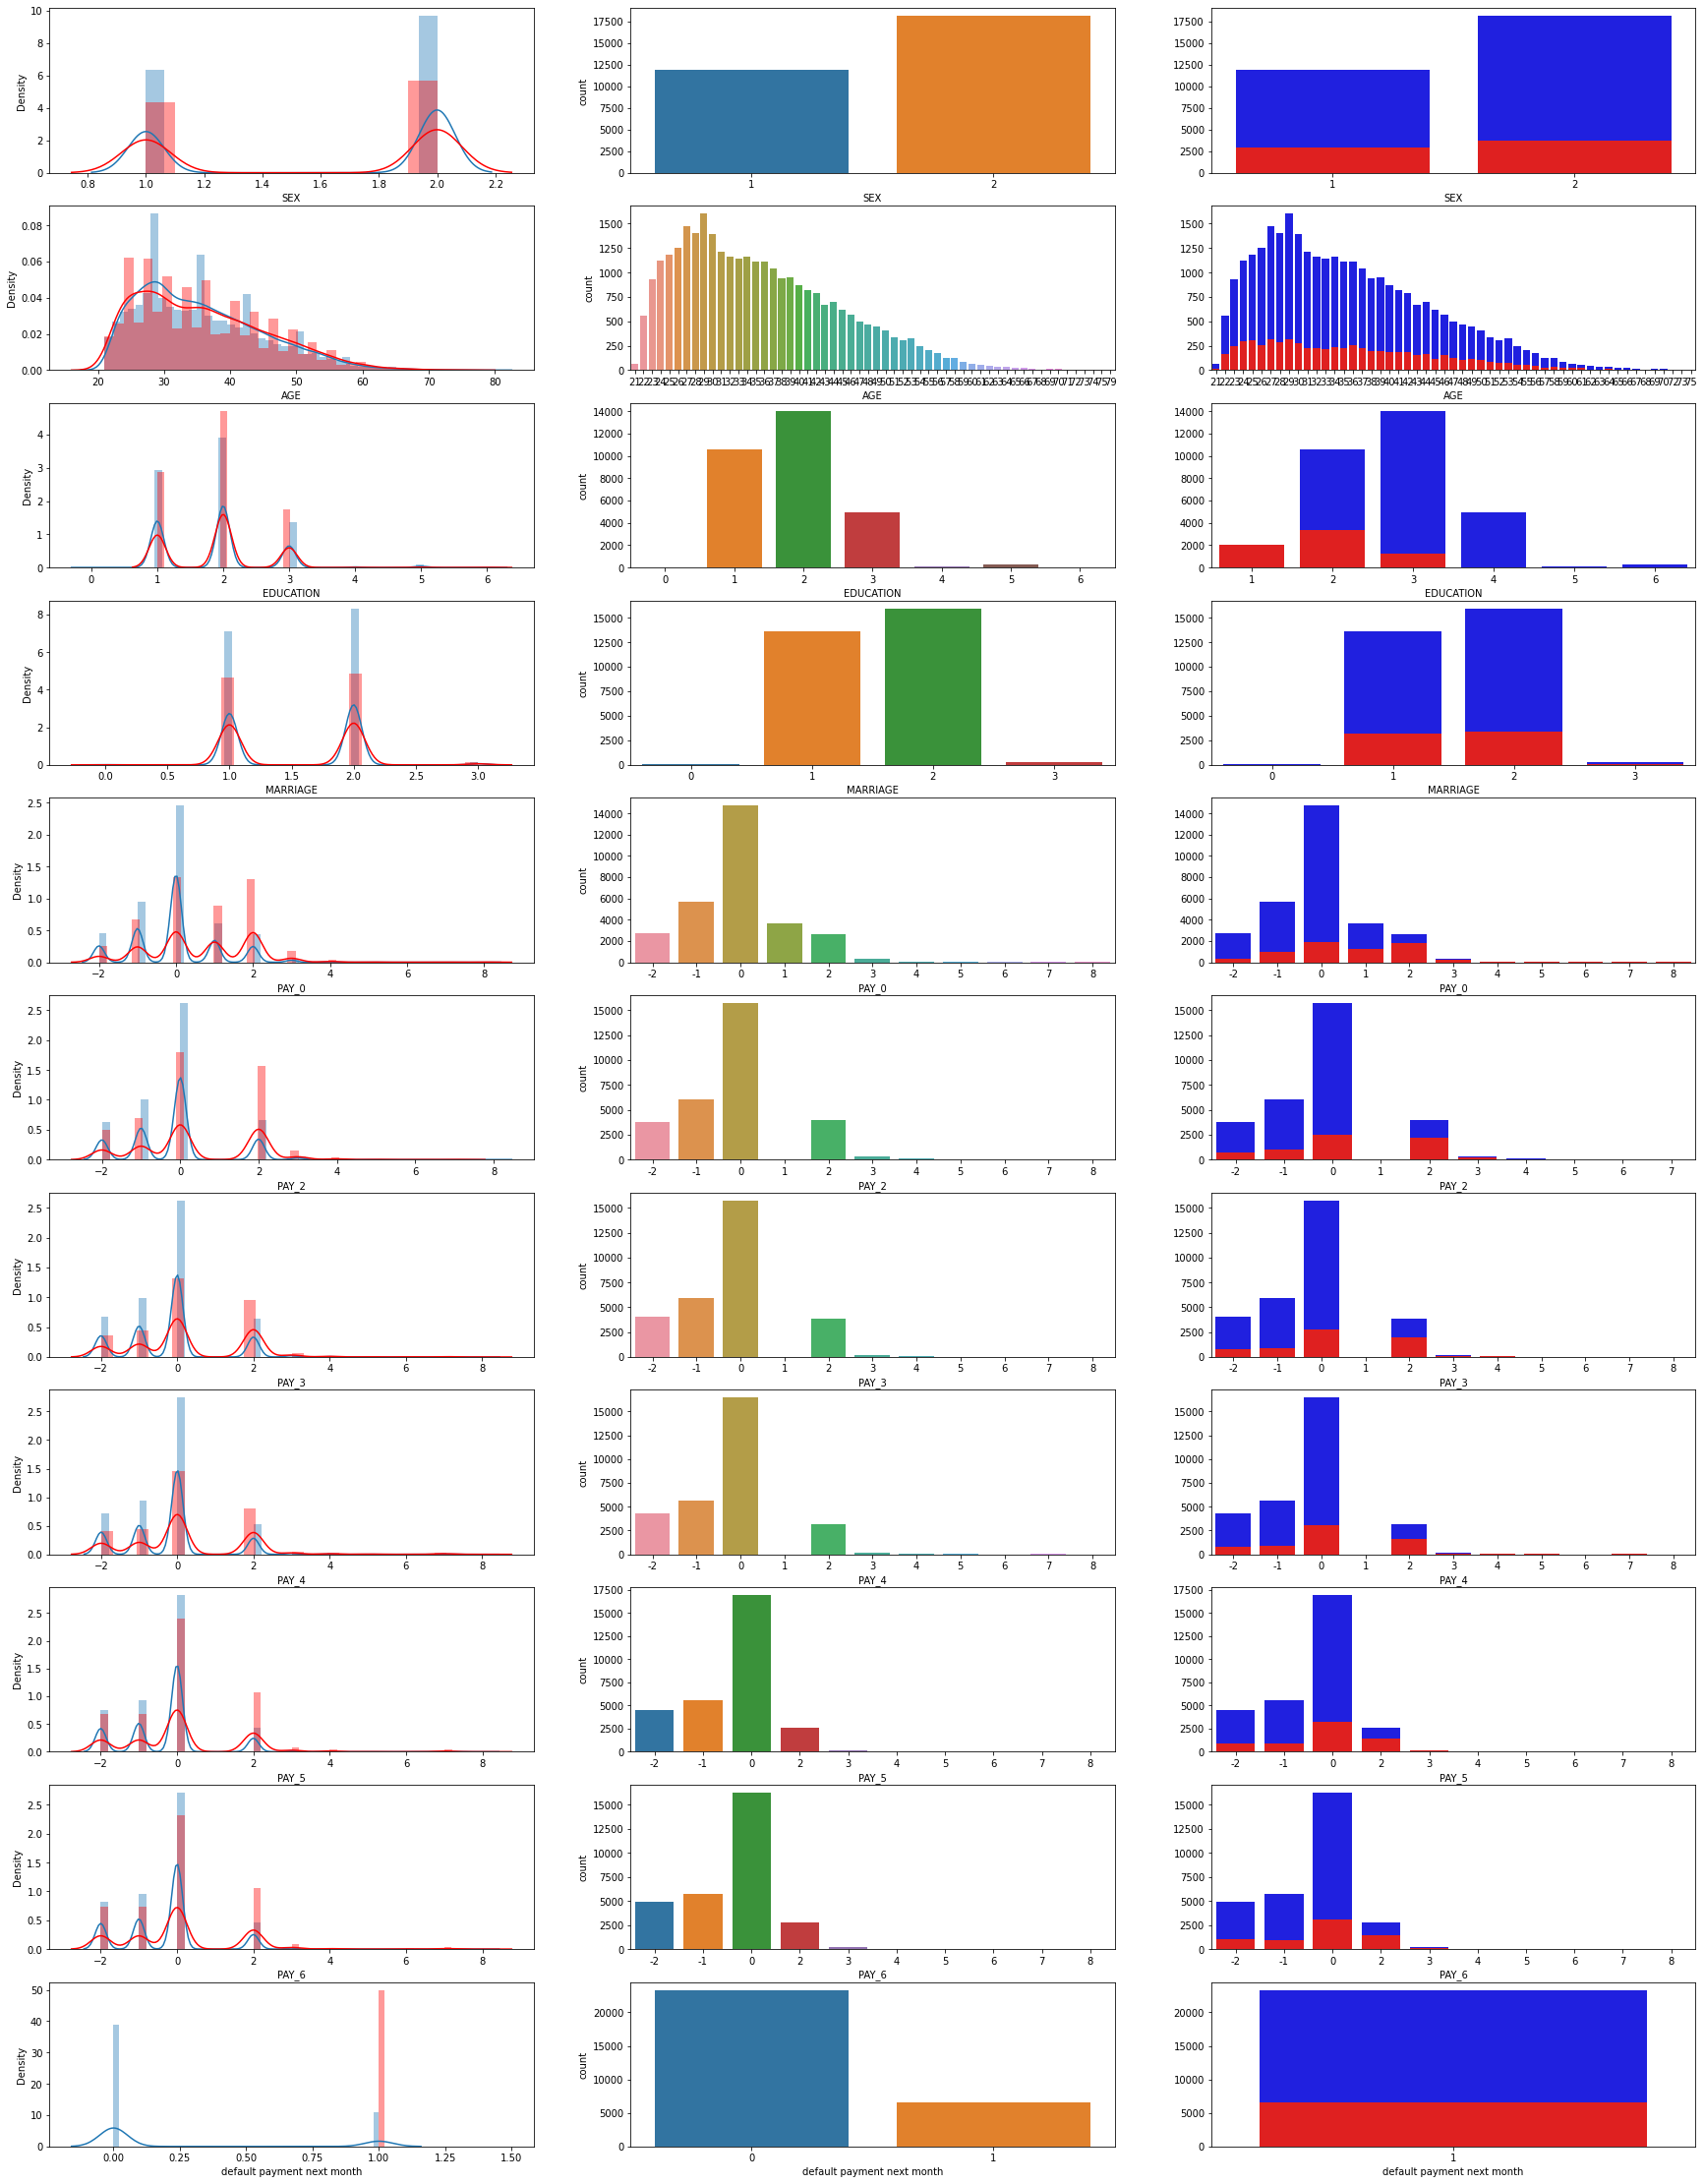

In [115]:
columns = ['SEX','AGE', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']
fig, axs = plt.subplots(len(columns),3,figsize=(30,40))
count=0
for i in columns:
    sns.distplot(df[i],ax=axs[count,0])
    sns.distplot(df_default[i],ax=axs[count,0],color='r') #shows the distribution of defaulters
    count+=1
count=0
for i in columns:
    sns.countplot(df[i],ax=axs[count,1])
    count+=1
counter=0
for i in columns:
  temp=df.groupby(i)['default payment next month'].count()
  temp2=df_default.groupby(i)['default payment next month'].count() 
  sns.barplot(temp.index,temp.values,ax=axs[counter,2],color='b')
  sns.barplot(temp2.index,temp2.values,color='r',ax=axs[counter,2]) #here blue color represents the default values
  counter+=1

  ##Red color represents the Defaulters

Loads of interpretations can be formed by looking at above charts:


1.   Column 1 shows the distributions of all the values in blue and defaulters in red
2.   Column 2 shows the counts of all the values &
3.    Column 3 shows the count plot of Defaulte











lets do a Anomaly detection now, the most correlated feature with our label is PAY_0 and similar others which actually is quite logical for this prediction and thus we will use this relation to find anomalies. (here anomalies signifies to person who are very punctual but have been defaulter because of certain unavoidable reasons)

In [150]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']])
clf = IsolationForest(n_estimators=100, contamination=0.005, random_state=0)
clf.fit(X)

df['multivariate_anomaly_score'] = clf.decision_function(X)                     # predict raw anomaly score
df['multivariate_outlier'] = clf.predict(X)                                     # prediction of a datapoint category outlier or inlier
df2=df


In [151]:
df=df[df.multivariate_outlier==1]
print(df.shape)  #outliers have been removed
df.drop(['multivariate_anomaly_score','multivariate_outlier'],axis=1,inplace=True)
df.head()

(29850, 26)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,...,0,0,0,1
1,120000,2,2,2,...,1000,0,2000,1
2,90000,2,2,2,...,1000,1000,5000,0
3,50000,2,2,1,...,1100,1069,1000,0
4,50000,1,2,1,...,9000,689,679,0


#DecisionTree and XGBoost

In [152]:
X = df.drop(["default payment next month"],axis =1 )                            #making Final Datasets
y = df["default payment next month"]

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0) #train test split

In [171]:
def DecisionTreePrediction(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,max_depth=3,prediction=False,feature_plot=False,visuals=False): 
  '''
  Apply DecisionTree model on dataset to return the predicted values of test_set
  Takes input :
  For training model:
  X_train: astype numpy_array or pandas.core.frame.DataFrame, 
          contains features of Training set y_train: astype numpy_array, 
          contain lables of Training set
  For testing model performance:
  X_test: astype numpy_array or pandas.core.frame.DataFrame,
          contains features of Test set for which predictions are to be made
  y_test: astype numpy_array or pandas.core.frame.DataFrame,contains lables of 
          Training set for accuracy prediction
  max_depth: astype int, maximum depth of decision tree
  prediction: astype Boolean, if True returns predictions for X_test
  '''
  from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
  model= DecisionTreeClassifier(random_state=0,max_depth=max_depth)              #defining model
  model.fit(X_train,y_train)                                                     #training model
  y_pred_test=model.predict(X_test)                                              #predicting test_dataset
  y_pred_train=model.predict(X_train)
  mse=mean_squared_error(y_test,y_pred_test)                                     #calculating mean-square-error
  accuracy_test=accuracy_score(y_test,y_pred_test)                               #calculating accuracy
  accuracy_train=accuracy_score(y_train,y_pred_train)
  cm=confusion_matrix(y_test,y_pred_test)
  classificationReport=classification_report(y_test,y_pred_test,target_names=['Non-Defaulter', 'Defaulter'])
  if feature_plot==True:                                                                         
      important_Feature=pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
      plt.figure(figsize=(25,10))
      sns.barplot(important_Feature.index,important_Feature.values)
      plt.xticks(rotation=90)
      print(plt.show)
  if prediction==True:
      print(y_pred_test)
  if visuals==True:
    from sklearn.tree import export_graphviz
    from sklearn import tree
    from IPython.display import SVG
    from graphviz import Source
    from IPython.display import display
    graph = Source(tree.export_graphviz(model, out_file=None
      , feature_names=X_train.columns, class_names=['0', '1'] 
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
  return f'At max_depth ={ max_depth}: MSE = {mse}, Accuracy Score for Train Samples ={round(accuracy_train,4)*100}% and Accuracy Score for Test Samples ={round(accuracy_test,4)*100}% {print(Fore.RED+classificationReport+Fore.BLUE)}'


In [172]:
max_depth=[3,5,7,10,12]
for i in max_depth:
  print(DecisionTreePrediction(X_train,y_train,X_test,y_test,i,False,))

               precision    recall  f1-score   support

Non-Defaulter       0.85      0.95      0.90      4693
    Defaulter       0.67      0.36      0.47      1277

     accuracy                           0.83      5970
    macro avg       0.76      0.66      0.68      5970
 weighted avg       0.81      0.83      0.80      5970

At max_depth =3: MSE = 0.1747068676716918, Accuracy Score for Train Samples =82.21000000000001% and Accuracy Score for Test Samples =82.53% None
               precision    recall  f1-score   support

Non-Defaulter       0.84      0.95      0.90      4693
    Defaulter       0.67      0.36      0.47      1277

     accuracy                           0.83      5970
    macro avg       0.76      0.65      0.68      5970
 weighted avg       0.81      0.83      0.80      5970

At max_depth =5: MSE = 0.1747068676716918, Accuracy Score for Train Samples =82.38% and Accuracy Score for Test Samples =82.53% None
               precision    recall  f1-score   support



Max Accuracy using Decision Tree is 82.8%

<function show at 0x7f645933fe60>


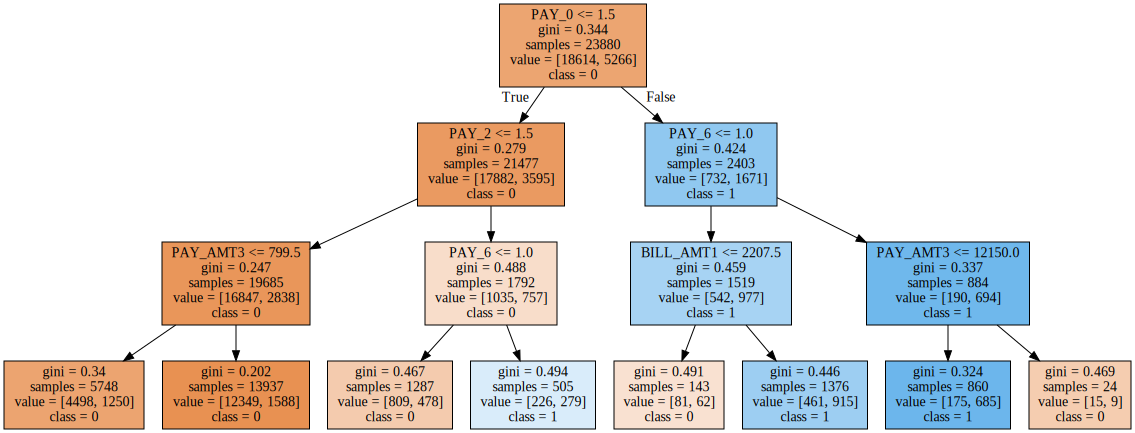

               precision    recall  f1-score   support

Non-Defaulter       0.85      0.95      0.90      4693
    Defaulter       0.67      0.36      0.47      1277

     accuracy                           0.83      5970
    macro avg       0.76      0.66      0.68      5970
 weighted avg       0.81      0.83      0.80      5970



'At max_depth =3: MSE = 0.1747068676716918, Accuracy Score for Train Samples =82.21000000000001% and Accuracy Score for Test Samples =82.53% None'

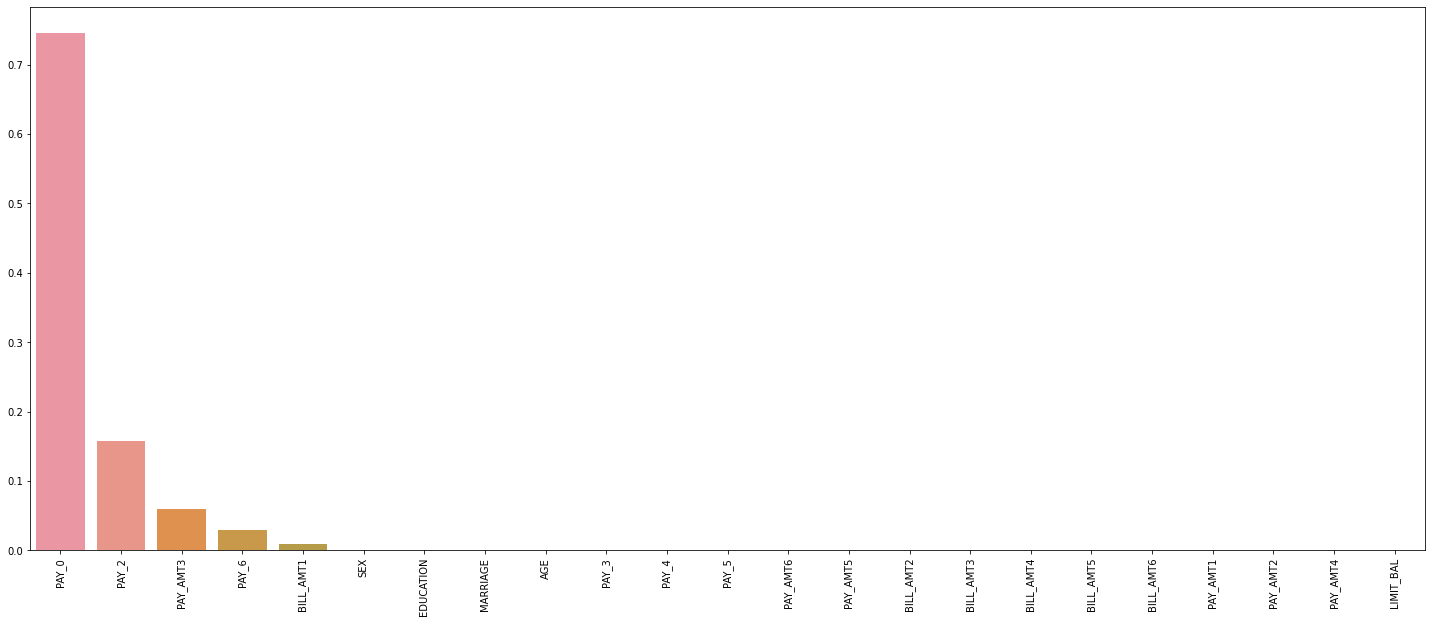

In [170]:
DecisionTreePrediction(X_train,y_train,X_test,y_test,3,False,True,True) #for max depth 3, i am running the model to get some visuals of tree and feature importance chart

This Graph is very intrutive, it is clear now that most important feature in  deciding that person in Defaulter or not is the status of his past month credit card bill payment.




In [173]:
model=XGBClassifier() #XGBoost
n_estimators = [5,10,20,50,100]
max_depth = [3,4,5,6,7]
param_grid = dict(max_depth=max_depth,n_estimators=n_estimators)                                          
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)   
# summarize results
print(Fore.RED+"Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)+Fore.BLUE)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.428901 using {'max_depth': 5, 'n_estimators': 50}
-0.544473 (0.000683) with: {'max_depth': 3, 'n_estimators': 5}
-0.482997 (0.001335) with: {'max_depth': 3, 'n_estimators': 10}
-0.444004 (0.002000) with: {'max_depth': 3, 'n_estimators': 20}
-0.430940 (0.002999) with: {'max_depth': 3, 'n_estimators': 50}
-0.429057 (0.003423) with: {'max_depth': 3, 'n_estimators': 100}
-0.542563 (0.000818) with: {'max_depth': 4, 'n_estimators': 5}
-0.480762 (0.001303) with: {'max_depth': 4, 'n_estimators': 10}
-0.441347 (0.002025) with: {'max_depth': 4, 'n_estimators': 20}
-0.429444 (0.002912) with: {'max_depth': 4, 'n_estimators': 50}
-0.429469 (0.003521) with: {'max_depth': 4, 'n_estimators': 100}
-0.541560 (0.000749) with: {'max_depth': 5, 'n_estimators': 5}
-0.479655 (0.001251) with: {'max_depth': 5, 'n_estimators': 10}
-0.439998 (0.002226) with: {'max_depth': 5, 'n_estimators': 20}
-0.428901 (0.003149) with: {'max_depth': 5, 'n_estimators': 50}
-0.430015 (0.003711) with: {'max_depth': 5, 'n

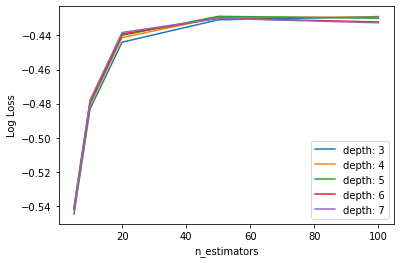

In [174]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')   

In [175]:
model2=XGBClassifier(max_depth=5,n_estimators=50)
model2.fit(X_train,y_train)
y_pred_test2=model2.predict(X_test)                                              
y_pred_train2=model2.predict(X_train)
y_pred_test_prob=model2.predict_proba(X_test)                                   # will be used for KS Chart Calculation
mse2=mean_squared_error(y_test,y_pred_test2)                                    
accuracy_test2=accuracy_score(y_test,y_pred_test2)                              
accuracy_train2=accuracy_score(y_train,y_pred_train2)
print(Fore.BLUE+f'MSE = {mse2}, Accuracy Score for Train Samples ={round(accuracy_train2,3)} and Accuracy Score for Test Samples ={round(accuracy_test2,3)}') 

MSE = 0.17420435510887772, Accuracy Score for Train Samples =0.83 and Accuracy Score for Test Samples =0.826


<function matplotlib.pyplot.show>

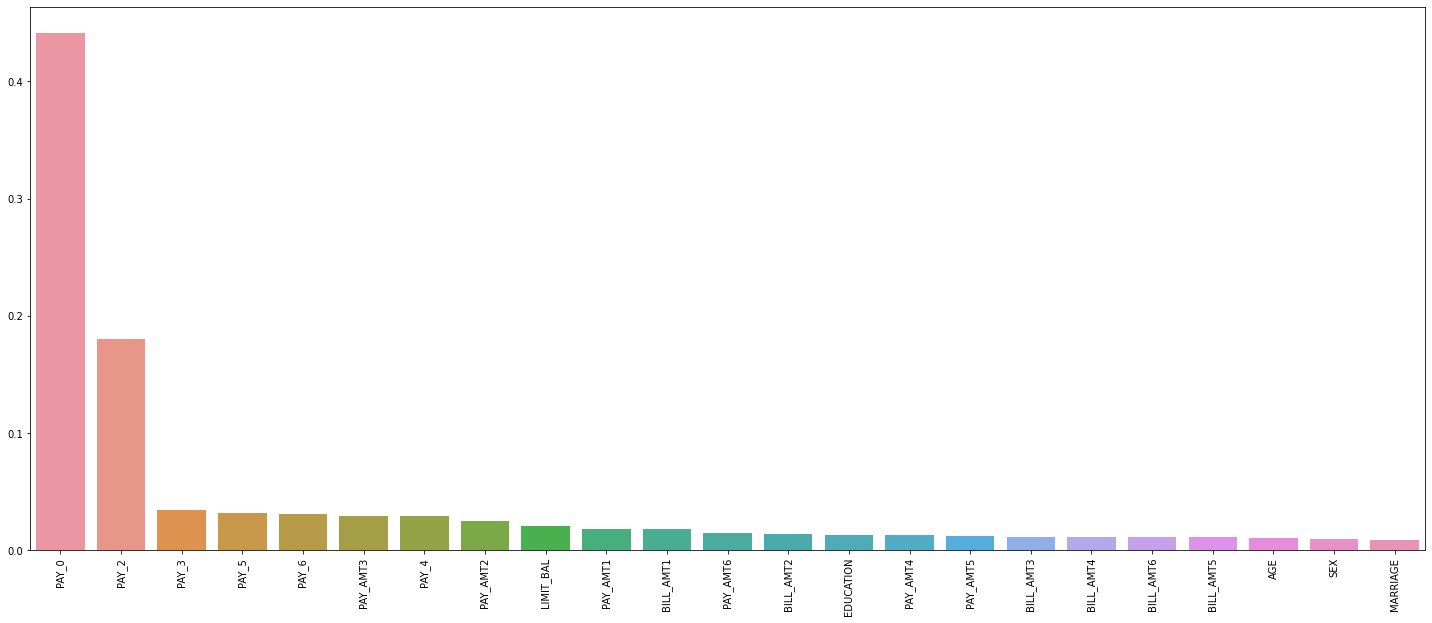

In [176]:
important_Feature=pd.Series(model2.feature_importances_, X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(important_Feature.index,important_Feature.values)
plt.xticks(rotation=90)
plt.show

[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

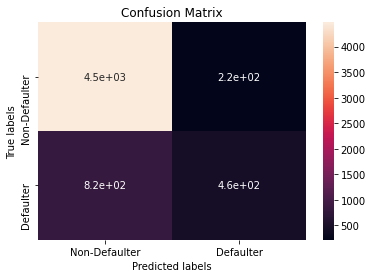

In [177]:
labels = ['Non-Defaulter', 'Defaulter']
cm_test = confusion_matrix(y_test, y_pred_test2)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [178]:
print(Fore.RED+classification_report(y_test,y_pred_test2,target_names=['Non-Defaulter', 'Defaulter']))

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.95      0.90      4693
    Defaulter       0.68      0.36      0.47      1277

     accuracy                           0.83      5970
    macro avg       0.76      0.65      0.68      5970
 weighted avg       0.81      0.83      0.80      5970



Thus using XGBoost Best result i could get is MSE:

*    0.1705, Accuracy Score for Train Samples =0.825 and Accuracy Score for Test Samples =0.83


#Trying Oversampling Technique (SMOTE)


In [179]:
oversample = SMOTE() #usnig oversampling technique to create synthetic data and deal with class inbalance
X, y = oversample.fit_resample(X, y)

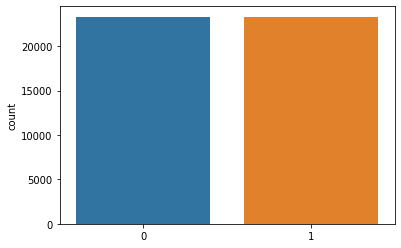

In [180]:
sns.countplot(y)

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0) #train test split

In [182]:
DecisionTreePrediction()

               precision    recall  f1-score   support

Non-Defaulter       0.85      0.95      0.90      4693
    Defaulter       0.67      0.36      0.47      1277

     accuracy                           0.83      5970
    macro avg       0.76      0.66      0.68      5970
 weighted avg       0.81      0.83      0.80      5970



'At max_depth =3: MSE = 0.1747068676716918, Accuracy Score for Train Samples =82.21000000000001% and Accuracy Score for Test Samples =82.53% None'

In [183]:
model=XGBClassifier() #XGBoost
n_estimators = [100,150,200]
max_depth = [10,12,15]
param_grid = dict(max_depth=max_depth,n_estimators=n_estimators)                                          
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)   
# summarize results
print(Fore.RED+"Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)+Fore.BLUE)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.373477 using {'max_depth': 10, 'n_estimators': 200}
-0.389985 (0.001176) with: {'max_depth': 10, 'n_estimators': 100}
-0.378268 (0.002959) with: {'max_depth': 10, 'n_estimators': 150}
-0.373477 (0.003914) with: {'max_depth': 10, 'n_estimators': 200}
-0.382449 (0.002665) with: {'max_depth': 12, 'n_estimators': 100}
-0.375119 (0.003447) with: {'max_depth': 12, 'n_estimators': 150}
-0.373787 (0.004238) with: {'max_depth': 12, 'n_estimators': 200}
-0.383525 (0.003964) with: {'max_depth': 15, 'n_estimators': 100}
-0.382377 (0.004204) with: {'max_depth': 15, 'n_estimators': 150}
-0.385758 (0.004369) with: {'max_depth': 15, 'n_estimators': 200}


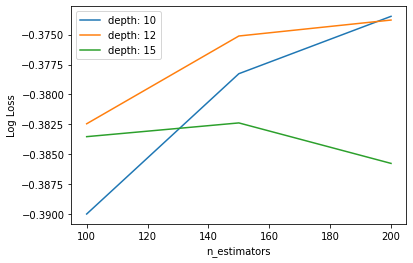

In [184]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')   

In [188]:
model2=XGBClassifier(max_depth=12,n_estimators=200,random_state=0)
model2.fit(X_train,y_train)
y_pred_test2=model2.predict(X_test)                                              
y_pred_train2=model2.predict(X_train)
y_pred_test_prob=model2.predict_proba(X_test)                                   # will be used for KS Chart Calculation
mse2=mean_squared_error(y_test,y_pred_test2)                                    
accuracy_test2=accuracy_score(y_test,y_pred_test2)                              
accuracy_train2=accuracy_score(y_train,y_pred_train2)
print(Fore.BLUE+f'MSE = {mse2}, Accuracy Score for Train Samples ={round(accuracy_train2,3)} and Accuracy Score for Test Samples ={round(accuracy_test2,3)}') 

MSE = 0.14383782044406307, Accuracy Score for Train Samples =0.994 and Accuracy Score for Test Samples =0.856


[[4013  598]
 [ 743 3969]]


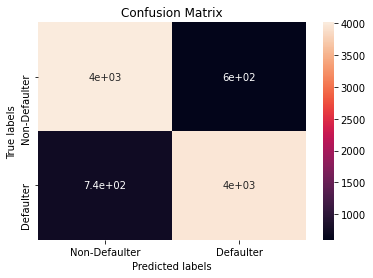

In [189]:
labels = ['Non-Defaulter', 'Defaulter']
cm_test = confusion_matrix(y_test, y_pred_test2)
print(cm_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [190]:
print(Fore.RED+classification_report(y_test,y_pred_test2,target_names=['Non-Defaulter', 'Defaulter']))

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.87      0.86      4611
    Defaulter       0.87      0.84      0.86      4712

     accuracy                           0.86      9323
    macro avg       0.86      0.86      0.86      9323
 weighted avg       0.86      0.86      0.86      9323



again the values for recall is really very bad over here

XGBoost provides the Best Chances of Predicting Defaulters,we will now Apply probabilies generated from this model for KS Chart &Analysis


#Now we'll be using Logistic Regression & SVM thus we will have to process our data further

In [199]:
df['Total_BILL_AMT']=df.BILL_AMT1+df.BILL_AMT2+df.BILL_AMT3+df.BILL_AMT4+df.BILL_AMT5+df.BILL_AMT6              #adding all bill amount as they are highly corelated
df.drop(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']], axis=1,inplace=True)

In [200]:
X = df.drop(["default payment next month"],axis =1 )                            #making Final Datasets
y = df["default payment next month"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0) #getting new values

In [201]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.806, test=0.807), total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............. , accuracy=(train=0.804, test=0.810), total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ............. , accuracy=(train=0.808, test=0.806), total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] ............. , accuracy=(train=0.807, test=0.804), total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.808, test=0.805), total=   0.4s
The accuracy on train data is 80.7% and The accuracy on test data is 82.13% for model Logistic Model


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


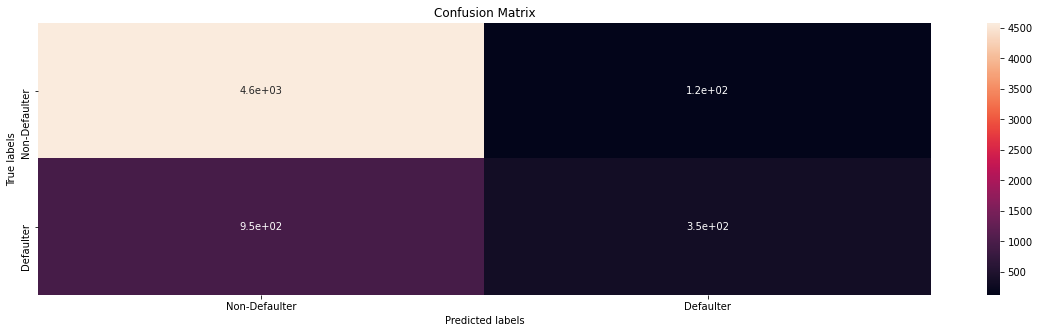

               precision    recall  f1-score   support

Non-Defaulter       0.83      0.97      0.90      4703
    Defaulter       0.74      0.27      0.39      1297

     accuracy                           0.82      6000
    macro avg       0.78      0.62      0.64      6000
 weighted avg       0.81      0.82      0.79      6000

Epoch 1/10
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4948 - accuracy: 0.7854 - val_loss: 0.4614 - val_accuracy: 0.8100
Epoch 2/10
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4654 - accuracy: 0.8042 - val_loss: 0.4518 - val_accuracy: 0.8104
Epoch 3/10
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4587 - accuracy: 0.8070 - val_loss: 0.4455 - val_accuracy: 0.8150
Epoch 4/10
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4554 - accuracy: 0.8093 - val_loss: 0.4464 - val_accuracy: 0.8138
Epoch 5/10
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4537 - accura

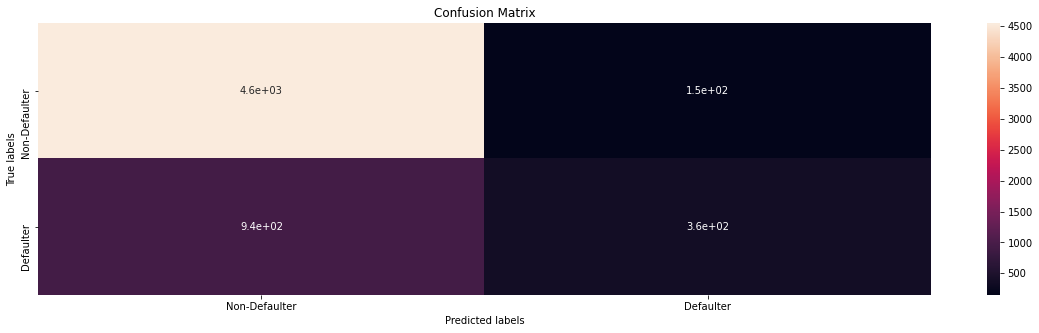

               precision    recall  f1-score   support

Non-Defaulter       0.83      0.97      0.89      4703
    Defaulter       0.70      0.28      0.40      1297

     accuracy                           0.82      6000
    macro avg       0.77      0.62      0.65      6000
 weighted avg       0.80      0.82      0.79      6000

The accuracy on train data is 80.7% and The accuracy on test data is 81.72% for model SVM


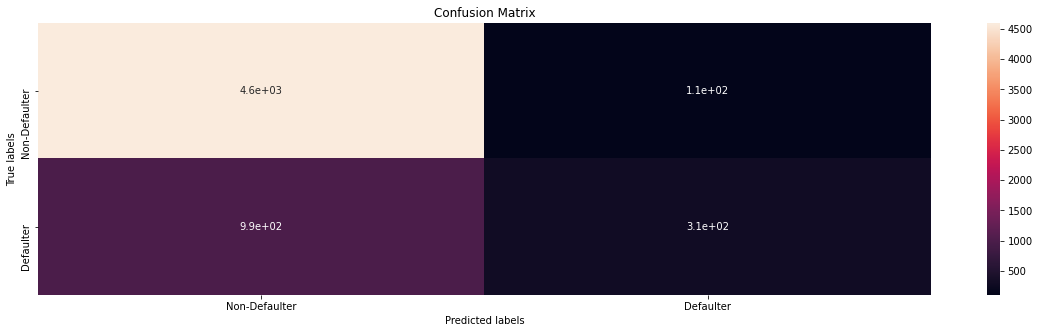

               precision    recall  f1-score   support

Non-Defaulter       0.82      0.98      0.89      4703
    Defaulter       0.74      0.24      0.36      1297

     accuracy                           0.82      6000
    macro avg       0.78      0.61      0.63      6000
 weighted avg       0.81      0.82      0.78      6000



In [202]:
model3 = {LogisticRegression(fit_intercept=True, max_iter=10000)          : 'Logistic Model',
          Sequential([
                      Dense(16,input_dim=18,activation='relu'),                         #here neural network is quite shallow,else better results could be achieved.
                      Dense(2,activation='softmax')
          ])                                                              : 'Neural Network',
          SVC(kernel='linear')                                            : 'SVM'
          }
count=0
for model,name in model3.items():
  if count==1:
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])     #implementation for neural network is a bit different and thus i have created this conditional statement
    model.fit(X_train, y_train,epochs=10,batch_size=16,validation_split=0.1)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    train_class_preds = np.argmax(train_class_preds,axis=-1)
    test_class_preds = np.argmax(test_class_preds,axis=-1)
  else:
    model.fit(X_train, y_train)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
  try:
    test_class_prob=model.predict_proba(X_test)
  except:
    pass
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)
  if count==0:
    scoring = ['accuracy']
    scores = cross_validate(model,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,verbose = 5)
 
  
  from colorama import Fore
  print(Fore.BLUE +f"The accuracy on train data is {round(train_accuracy*100,2)}% and The accuracy on test data is {round(test_accuracy*100,2)}% for model {name}")
  labels = ['Non-Defaulter', 'Defaulter']
  cm_test = confusion_matrix(y_test, test_class_preds)
  fig, ax= plt.subplots(figsize=(20,5))
  sns.heatmap(cm_test, annot=True, ax = ax) 
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

  plt.show()
  print(Fore.RED+classification_report(y_test,test_class_preds,target_names=['Non-Defaulter', 'Defaulter'])+Fore.YELLOW)
  
  count+=1


Again Recall is very low and thus i will be using the SMOTE on this transformed dataset aswell

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.721, test=0.727), total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.721, test=0.725), total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ............. , accuracy=(train=0.724, test=0.718), total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.724, test=0.713), total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.720, test=0.727), total=   0.8s
The accuracy on train data is 72.22% and The accuracy on test data is 71.2% for model Logistic Model


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


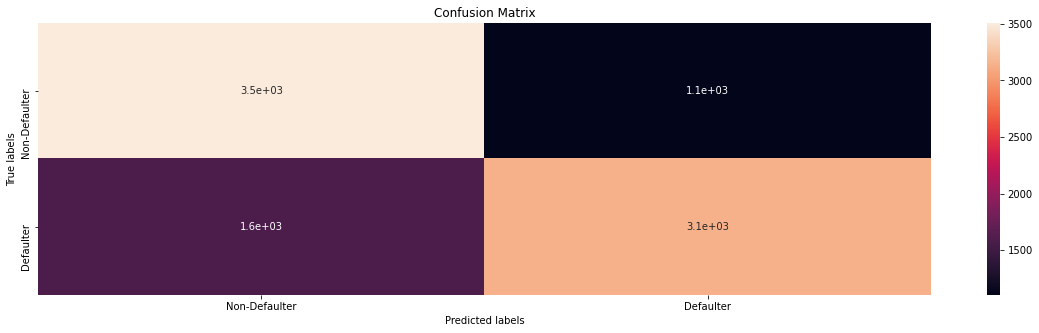

               precision    recall  f1-score   support

Non-Defaulter       0.69      0.76      0.72      4613
    Defaulter       0.74      0.66      0.70      4733

     accuracy                           0.71      9346
    macro avg       0.71      0.71      0.71      9346
 weighted avg       0.71      0.71      0.71      9346

Epoch 1/10
2103/2103 [==============================] - 3s 1ms/step - loss: 0.5730 - accuracy: 0.7053 - val_loss: 0.5541 - val_accuracy: 0.7237
Epoch 2/10
2103/2103 [==============================] - 3s 1ms/step - loss: 0.5514 - accuracy: 0.7254 - val_loss: 0.5432 - val_accuracy: 0.7309
Epoch 3/10
2103/2103 [==============================] - 3s 1ms/step - loss: 0.5481 - accuracy: 0.7269 - val_loss: 0.5408 - val_accuracy: 0.7334
Epoch 4/10
2103/2103 [==============================] - 3s 1ms/step - loss: 0.5450 - accuracy: 0.7301 - val_loss: 0.5437 - val_accuracy: 0.7331
Epoch 5/10
2103/2103 [==============================] - 3s 1ms/step - loss: 0.5421 - accura

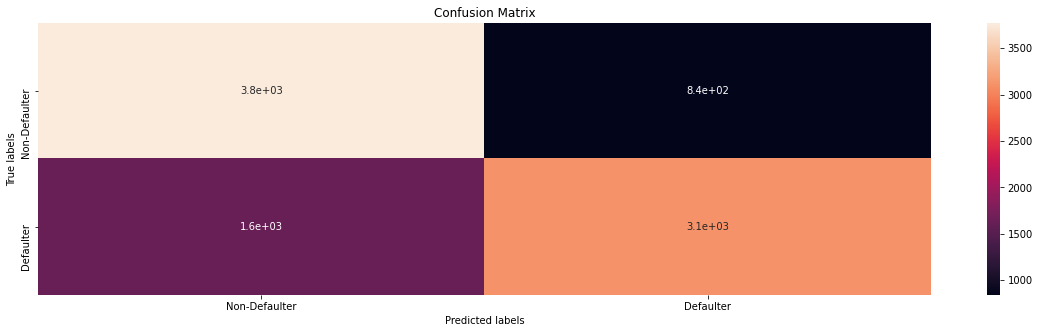

               precision    recall  f1-score   support

Non-Defaulter       0.70      0.82      0.75      4613
    Defaulter       0.79      0.66      0.72      4733

     accuracy                           0.74      9346
    macro avg       0.74      0.74      0.73      9346
 weighted avg       0.74      0.74      0.73      9346

The accuracy on train data is 72.33% and The accuracy on test data is 71.3% for model SVM


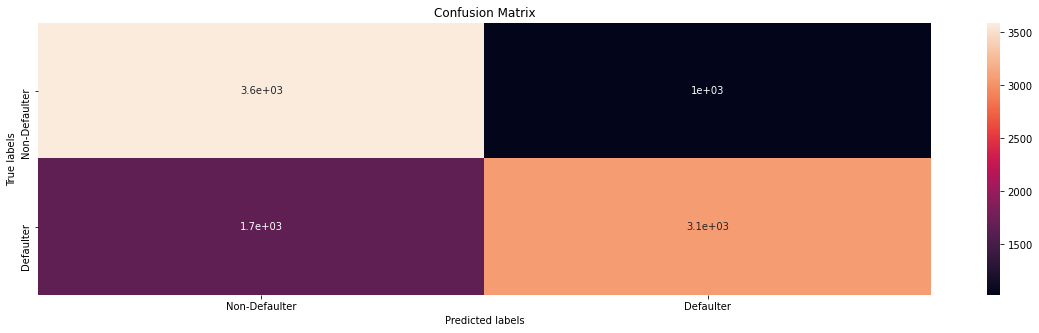

               precision    recall  f1-score   support

Non-Defaulter       0.68      0.78      0.73      4613
    Defaulter       0.75      0.65      0.70      4733

     accuracy                           0.71      9346
    macro avg       0.72      0.71      0.71      9346
 weighted avg       0.72      0.71      0.71      9346



In [204]:
oversample = SMOTE() #usnig oversampling technique to create synthetic data and deal with class inbalance
X, y = oversample.fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model3 = {LogisticRegression(fit_intercept=True, max_iter=10000)          : 'Logistic Model',
          Sequential([
                      Dense(16,input_dim=18,activation='relu'),    
                      Dense(32,input_dim=18,activation='relu'),                                    #here neural network is quite shallow,else better results could be achieved.
                      Dense(2,activation='softmax')
          ])                                                              : 'Neural Network',
          SVC(kernel='linear')                                            : 'SVM'
          }
count=0
for model,name in model3.items():
  if count==1:
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])     #implementation for neural network is a bit different and thus i have created this conditional statement
    model.fit(X_train, y_train,epochs=10,batch_size=16,validation_split=0.1)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    train_class_preds = np.argmax(train_class_preds,axis=-1)
    test_class_preds = np.argmax(test_class_preds,axis=-1)
  else:
    model.fit(X_train, y_train)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
  try:
    test_class_prob=model.predict_proba(X_test)
  except:
    pass
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)
  if count==0:
    scoring = ['accuracy']
    scores = cross_validate(model,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,verbose = 5)
 
  
  from colorama import Fore
  print(Fore.BLUE +f"The accuracy on train data is {round(train_accuracy*100,2)}% and The accuracy on test data is {round(test_accuracy*100,2)}% for model {name}")
  labels = ['Non-Defaulter', 'Defaulter']
  cm_test = confusion_matrix(y_test, test_class_preds)
  fig, ax= plt.subplots(figsize=(20,5))
  sns.heatmap(cm_test, annot=True, ax = ax) 
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

  plt.show()
  print(Fore.RED+classification_report(y_test,test_class_preds,target_names=['Non-Defaulter', 'Defaulter'])+Fore.YELLOW)
  
  count+=1


XGBoost have performed the best giving 86% Recall as well as Precision

#Ks_chart

In [205]:
max_p=[]
for i in range(len(y_pred_test_prob)):                         #test_class_prob
  max_p.append(max(y_pred_test_prob[i]))
ks_chart=pd.DataFrame(max_p,columns=['p'])
ks_chart['y']=y_pred_test2

In [206]:
ks_chart.head()

,p,y
0,0.874717,0
1,0.974242,0
2,0.578176,1
3,0.982346,0
4,0.502029,0


In [207]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    
    print(Fore.RED+"KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [208]:
mydf = ks(data=ks_chart,target="y", prob="p")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.996272  0.999991     834         99     18.26%         2.08%   
2       0.986191  0.996269     591        341     12.94%         7.17%   
3       0.971911  0.986177     380        552      8.32%        11.61%   
4       0.948987  0.971896     350        582      7.66%        12.24%   
5       0.917889  0.948947     375        557      8.21%        11.71%   
6       0.875400  0.917854     380        553      8.32%        11.63%   
7       0.815207  0.875307     386        546      8.45%        11.48%   
8       0.730774  0.814960     409        523      8.96%        11.00%   
9       0.618082  0.730746     399        533      8.74%        11.21%   
10      0.500194  0.617927     463        470     10.14%         9.88%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             18.26